<a href="https://colab.research.google.com/github/seyonechithrananda/gcn-molecule/blob/master/GraphConv_QSAR_geometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project De Novo: Graph Convolution Networks for Learning QSAR by Molecular Graphs. 

In this notebook, we explore the use of the geometric deep learning library for PyTorch for building QSAR models. Skip through the initial installations 

In [1]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local


--2020-02-24 02:03:42--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   147MB/s    in 3.5s    

2020-02-24 02:03:45 (147 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-n

In [3]:
!conda install pytorch-cpu torchvision-cpu -c pytorch
!conda install -y -c rdkit -c conda-forge -c matplotlib
!conda install -c anaconda numpy


import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytorch-cpu
    - torchvision-cpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    ninja-1.9.0                |   py37hfd86e86_0         1.2 MB
    pytorch-cpu-1.1.0          |      py3.7_cpu_0        53.6 MB  pytorch
    torchvision-cpu-0.3.0      |    py37_cuNone_1         3.8 MB  pytorch
    ------------------------------------------------------------
                                           Total:        61.5 MB

The following NEW packages will be INSTALLED:

  ninja              pkgs/main/linux-64::ninja-1.9.0-py37hfd86e86_0
  pytorch-cpu        pytorch/linux-64::pyt

In [10]:
!conda install -c rdkit rdkit


Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [28]:
!ls /content/gdrive/My\ Drive/Project\ De\ Novo/mol2graph.py

import sys
sys.path.append('/content/gdrive/My Drive/Project De Novo')

#!cat '/content/gdrive/My Drive/Project De Novo/mol2graph.py'
!cat '/content/gdrive/My Drive/Project De Novo/solubility.train.sdf'


Streaming output truncated to the last 5000 lines.
 21 23  2  0
M  END
>  <ID>  (954) 
1205

>  <NAME>  (954) 
Liothyronine

>  <SOL>  (954) 
-5.22

>  <SOL_classification>  (954) 
(A) low

>  <smiles>  (954) 
NC(Cc2cc(I)c(Oc1ccc(O)c(I)c1)c(I)c2)C(O)=O

$$$$
Metiazinic_Acid
     RDKit          2D

 19 21  0  0  0  0  0  0  0  0999 V2000
   -3.8968    0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8968   -0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5978   -1.5002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2989   -0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -1.5002    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    1.2806   -0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5978   -1.5002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8968   -0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8968    0.7501    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1950    1.5032    0.0000 

In [15]:
!pip install torch-geometric

     |████████████████████████████████| 143kB 2.6MB/s 
     |████████████████████████████████| 348kB 6.8MB/s 
     |████████████████████████████████| 51kB 13.9MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.4.2-cp37-none-any.whl size=224448 sha256=0440f591f4e3877e23a6c966c09fecba2dd8d182d7385d56bc3f4d0da02f6a85
  Stored in directory: /root/.cache/pip/wheels/0f/9d/a3/2de0c1fb436ec76e2942b4216b820589d40bc48395995c3076
  Created wheel for plyfile: filename=plyfile-0.7.1-cp37-none-any.whl size=32827 sha256=ed7d9a33b2cf5bc022adcddb295f14abc6f35b321d47fa41038714ef54a172f3
  Stored in directory: /root/.cache/pip/wheels/d6/0d/bf/6d603d81b98604d2ecfd5e99d4ab7c9af664fd5285ab82bbb0
Successfully built torch-geometric plyfile


**Network + Data pre-processing starts here.**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch.nn import BatchNorm1d
from torch.utils.data import Dataset
from torch_geometric.nn import GCNConv
from torch_geometric.nn import ChebConv
from torch_geometric.nn import global_add_pool, global_mean_pool
from torch_geometric.data import DataLoader
from torch_scatter import scatter_mean
import mol2graph
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import RDPaths



In [0]:
plt.style.use("ggplot")

train_mols = [m for m in Chem.SDMolSupplier('/content/gdrive/My Drive/Project De Novo/solubility.train.sdf')]
test_mols = [m for m in Chem.SDMolSupplier('/content/gdrive/My Drive/Project De Novo/solubility.test.sdf')]
sol_cls_dict = {'(A) low':0, '(B) medium':1, '(C) high':2}

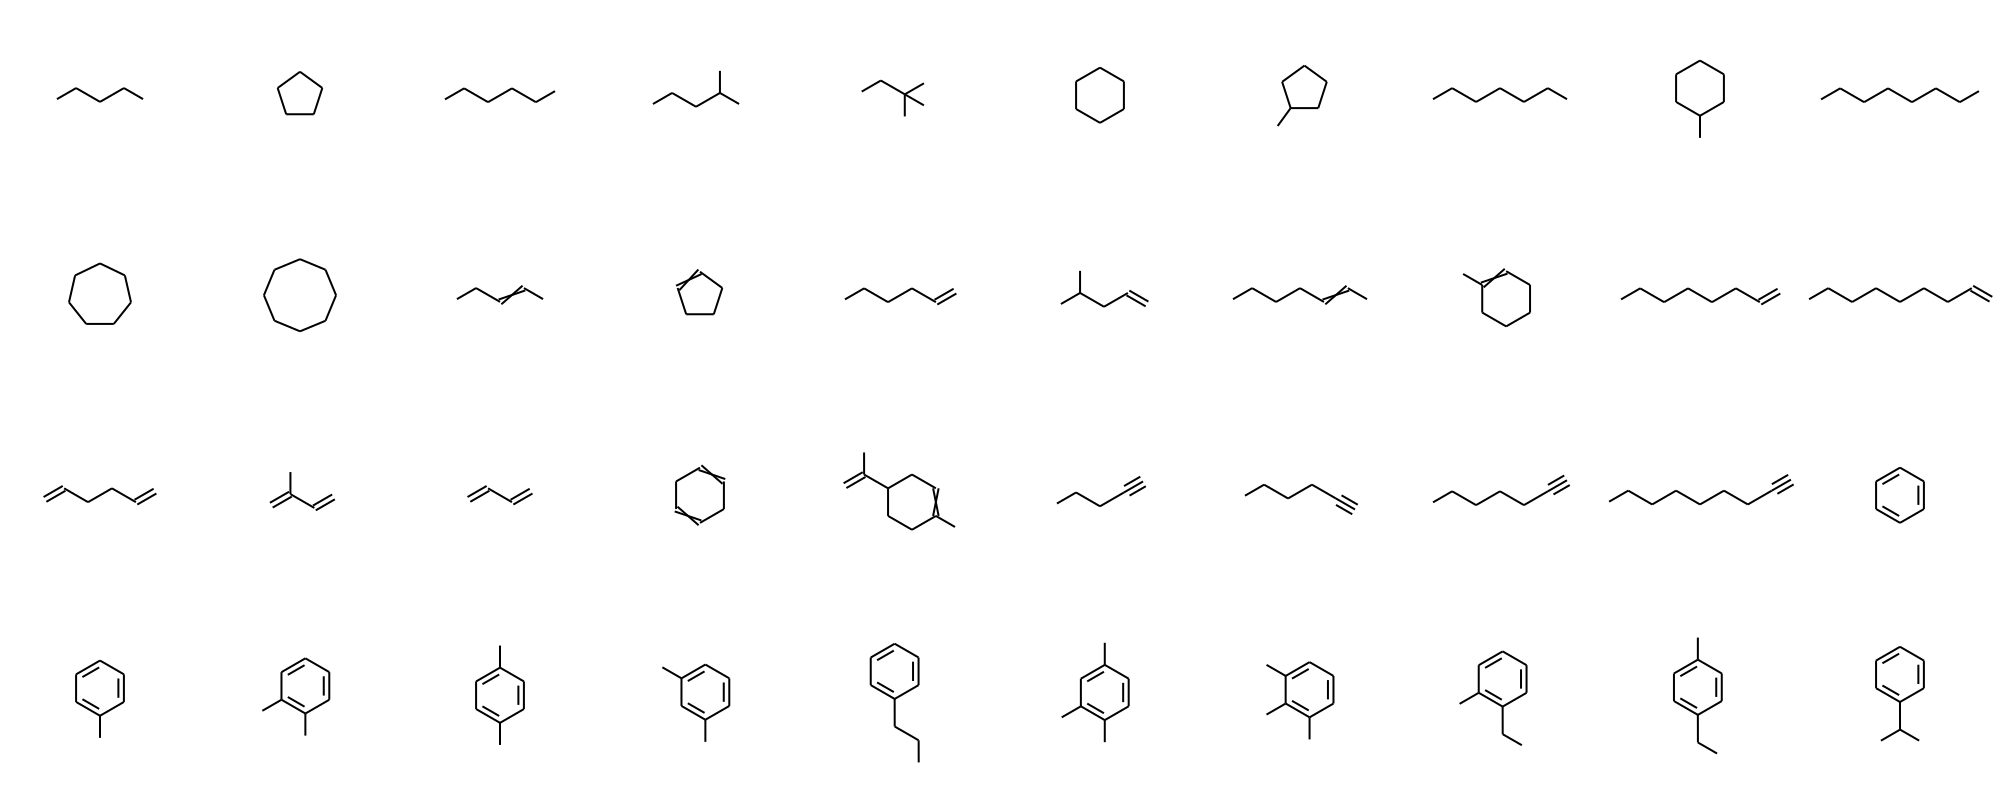

In [54]:
Draw.MolsToGridImage(train_mols[:40], molsPerRow=10)


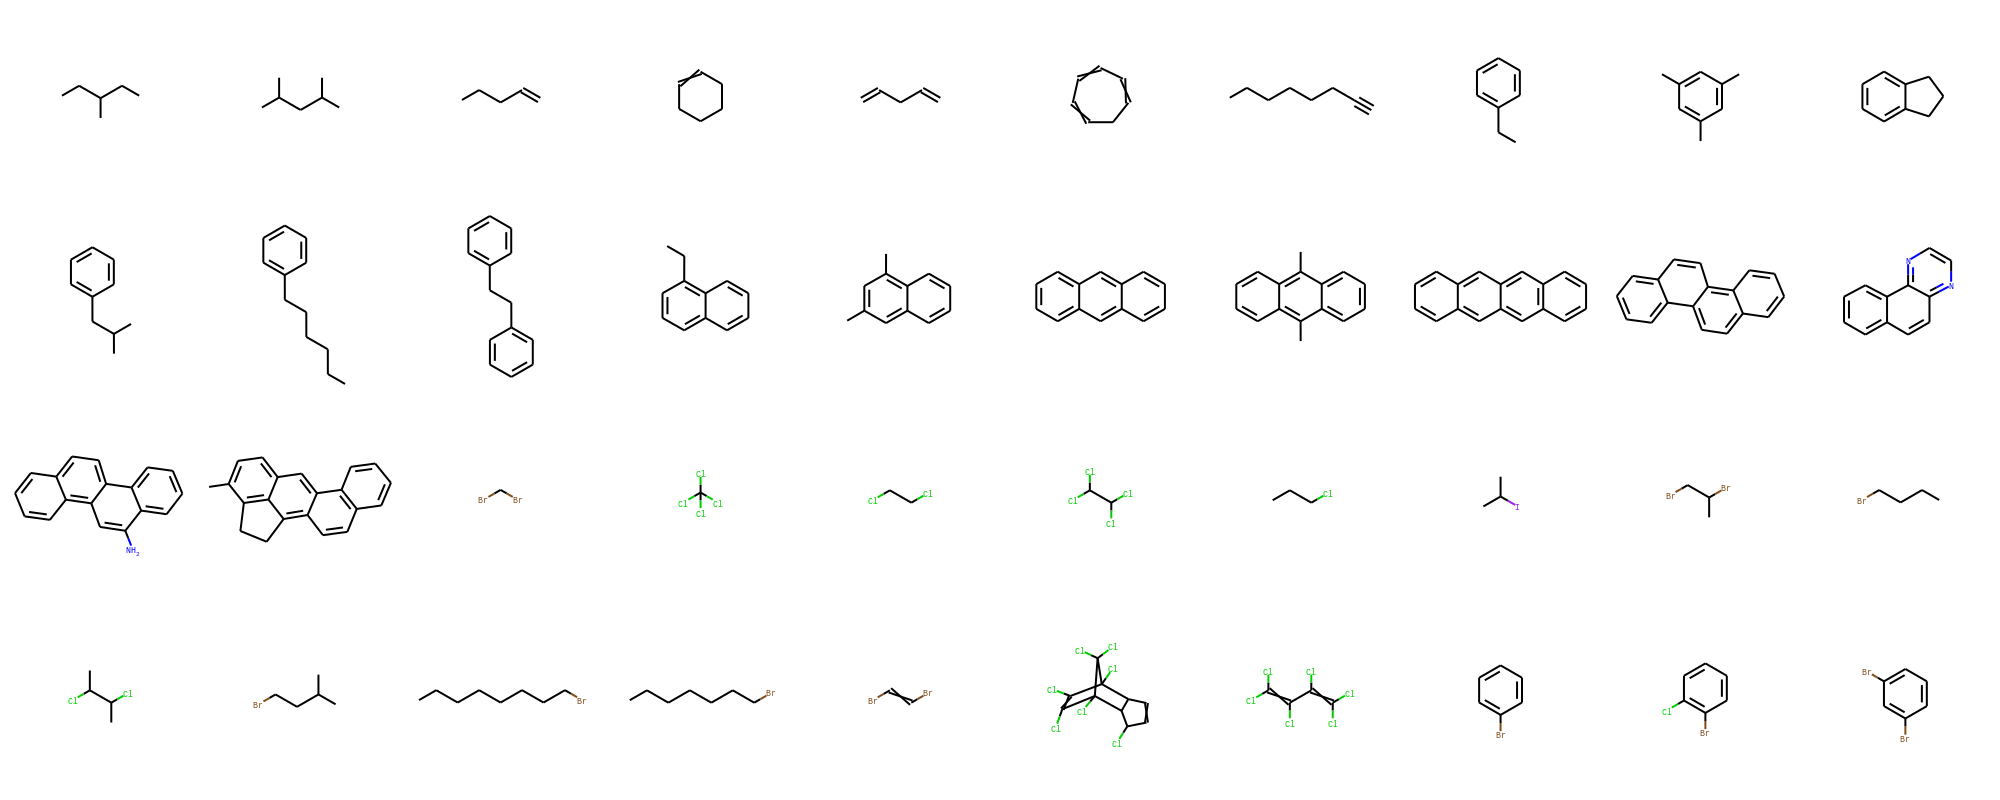

In [55]:
Draw.MolsToGridImage(test_mols[:40], molsPerRow=10)


In [0]:
train_X = [mol2graph.mol2vec(m) for m in train_mols]
for i, data in enumerate(train_X):
    y = sol_cls_dict[train_mols[i].GetProp('SOL_classification')]
    data.y = torch.tensor([y], dtype=torch.long)
 
test_X = [mol2graph.mol2vec(m) for m in test_mols]
for i, data in enumerate(test_X):
    y = sol_cls_dict[test_mols[i].GetProp('SOL_classification')]
    data.y = torch.tensor([y], dtype=torch.long)
train_loader = DataLoader(train_X, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_X, batch_size=64, shuffle=True, drop_last=True)

In [0]:
n_features = 75
# definenet
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(n_features, 128, cached=False) # if you defined cache=True, the shape of batch must be same!
        self.bn1 = BatchNorm1d(128)
        self.conv2 = GCNConv(128, 64, cached=False)
        self.bn2 = BatchNorm1d(64)
        self.fc1 = Linear(64, 64)
        self.bn3 = BatchNorm1d(64)
        self.fc2 = Linear(64, 64)
        self.fc3 = Linear(64, 3)
         
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.bn1(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.bn2(x)
        x = global_add_pool(x, data.batch)
        x = F.relu(self.fc1(x))
        x = self.bn3(x)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x       

Epoch: 1, Train loss: 0.844, Train_acc: 0.633, Test_acc: 0.646
Epoch: 2, Train loss: 0.602, Train_acc: 0.744, Test_acc: 0.755
Epoch: 3, Train loss: 0.591, Train_acc: 0.641, Test_acc: 0.63
Epoch: 4, Train loss: 0.555, Train_acc: 0.76, Test_acc: 0.735
Epoch: 5, Train loss: 0.468, Train_acc: 0.69, Test_acc: 0.673
Epoch: 6, Train loss: 0.45, Train_acc: 0.812, Test_acc: 0.778
Epoch: 7, Train loss: 0.432, Train_acc: 0.825, Test_acc: 0.786
Epoch: 8, Train loss: 0.436, Train_acc: 0.751, Test_acc: 0.716
Epoch: 9, Train loss: 0.415, Train_acc: 0.838, Test_acc: 0.798
Epoch: 10, Train loss: 0.378, Train_acc: 0.865, Test_acc: 0.844
Epoch: 11, Train loss: 0.354, Train_acc: 0.88, Test_acc: 0.817
Epoch: 12, Train loss: 0.33, Train_acc: 0.845, Test_acc: 0.782
Epoch: 13, Train loss: 0.37, Train_acc: 0.852, Test_acc: 0.809
Epoch: 14, Train loss: 0.369, Train_acc: 0.832, Test_acc: 0.794
Epoch: 15, Train loss: 0.313, Train_acc: 0.87, Test_acc: 0.802
Epoch: 16, Train loss: 0.353, Train_acc: 0.854, Test_acc:

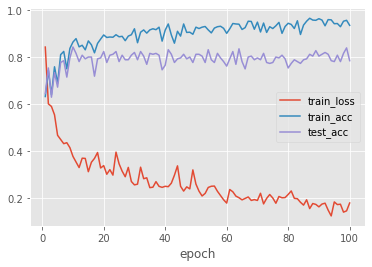

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
def train(epoch):
    model.train()
    loss_all = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, data.y)
        loss.backward()
        loss_all += loss.item() * data.num_graphs
        optimizer.step()
    return loss_all / len(train_X)
def test(loader):
    model.eval()
    correct = 0
    for data in loader:
        data = data.to(device)
        output = model(data)
        pred = output.max(dim=1)[1]
        correct += pred.eq(data.y).sum().item()
    return correct / len(loader.dataset)
hist = {"loss":[], "acc":[], "test_acc":[]}
for epoch in range(1, 101):
    train_loss = train(epoch)
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    hist["loss"].append(train_loss)
    hist["acc"].append(train_acc)
    hist["test_acc"].append(test_acc)
    print(f'Epoch: {epoch}, Train loss: {train_loss:.3}, Train_acc: {train_acc:.3}, Test_acc: {test_acc:.3}')
ax = plt.subplot(1,1,1)
ax.plot([e for e in range(1,101)], hist["loss"], label="train_loss")
ax.plot([e for e in range(1,101)], hist["acc"], label="train_acc")
ax.plot([e for e in range(1,101)], hist["test_acc"], label="test_acc")
plt.xlabel("epoch")
ax.legend()

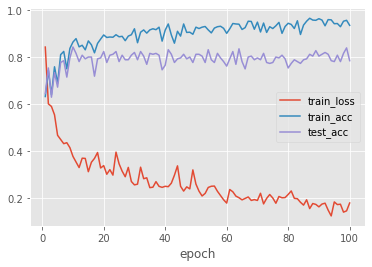

In [45]:
ax = plt.subplot(1,1,1)
ax.plot([e for e in range(1,101)], hist["loss"], label="train_loss")
ax.plot([e for e in range(1,101)], hist["acc"], label="train_acc")
ax.plot([e for e in range(1,101)], hist["test_acc"], label="test_acc")
plt.xlabel("epoch")
ax.legend()


**Compare GCN with Random Forest Classifier**

Now that we've trained the GCN on the solubility datasets from RDKit, lets benchmark them with standard SKLearn Random Forest Classifier (using bit vectors as molecular fingerprints).

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from rdkit.Chem import DataStructs

train_fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2) for mol in train_mols]
test_fps =  [AllChem.GetMorganFingerprintAsBitVect(mol,2) for mol in test_mols]


In [0]:
train_X = []
for fp in train_fps:
    arr = np.zeros(0,)
    DataStructs.ConvertToNumpyArray(fp, arr)
    train_X.append(arr)
train_X = np.asarray(train_X)
train_Y = [sol_cls_dict[train_mols[i].GetProp('SOL_classification')] for i in range(len(train_mols))]

test_X = []
for fp in test_fps:
    arr = np.zeros(0,)
    DataStructs.ConvertToNumpyArray(fp, arr)
    test_X.append(arr)
test_X = np.asarray(test_X)
test_Y = [sol_cls_dict[test_mols[i].GetProp('SOL_classification')] for i in range(len(test_mols))]


In [49]:
rfc = RandomForestClassifier()
rfc.fit (train_X, train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred = rfc.predict(test_X)

In [52]:
print(classification_report(test_Y, pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       102
           1       0.70      0.69      0.69       115
           2       0.62      0.62      0.62        40

    accuracy                           0.72       257
   macro avg       0.70      0.70      0.70       257
weighted avg       0.72      0.72      0.72       257



In [53]:
print (accuracy_score(test_Y, pred))

0.7159533073929961


As we can see, the test accuracy of the GCN outperforms the Random Forest Classifier by at least 10% on any given metric. From this notebook, we can see the promise of GCN's. If one were to tweak the network above, the accuracy could be easily improved.